In [125]:
# part 1
import copy
lines = open('inputs/input_11_test.txt','r').read().splitlines()
# lines = open('inputs/input_11.txt','r').read().splitlines()

# read the data
G = 7 # number of lines in a group
lines
monkeys = {}
operation = []
operation_num = []
throwto = {}
divisible_test = []
num_monkeys = (len(lines)+1)//7
for m in range(num_monkeys): # loop on monkeys
    # monkeys
    line = lines[G*m + 0]
    
    # items
    line = lines[G*m + 1]
    [_,line] = line.split(':')
    monkeys[m] = [int(x) for x in line.split(',')]

    # operation
    line = lines[G*m + 2].split(' ')
    line2 = lines[G*m + 3].split(' ')
    operation.append(line[-2])
    operation_num.append(line[-1])

    # division test
    line = lines[G*m + 3]  # divisible test
    line = line.split(' ')
    divisible_test.append(int(line[-1]))

    # throw to
    line = lines[G*m + 4].split(' ')
    line2 = lines[G*m + 5].split(' ')
    throwto[m] = (int(line[-1]), int(line2[-1]))

print(f'monkeys worry list = {monkeys}')
print(f'operation = {operation}')
print(f'operation_num = {operation_num}')
print(f'divisible_test = {divisible_test}')
print(f'throwto (if: true,false) = {throwto}')
monkey_start = copy.deepcopy(monkeys)  # use this to initialize part 2

# process the data, monkeys throw items
inspected = [0]*num_monkeys
for r in range(20): # rounds
    for m in range(num_monkeys): # monkeys
        for item in monkeys[m]: # items to be throw
            # print(item)

            # operation
            if operation_num[m].isnumeric():
                x = int(operation_num[m])
            else:
                x = item
            if operation[m] == '+':
                newitem = item + x
            elif operation[m] == '*':
                newitem = item * x

            # divide by 3
            newitem = newitem // 3

            # test
            if newitem % divisible_test[m] == 0:
                monkeys[throwto[m][0]].append(newitem)
            else:
                monkeys[throwto[m][1]].append(newitem)
            inspected[m] += 1 # log up that monkey inspected and threw an item

        monkeys[m] = [] # remove this monkey's list
# print(monkeys)
print(f'number of inspected items = {inspected}')

inspected.sort(reverse=True)
print(f'sorted inspection list = {inspected}')
print(f'monkey business = {inspected[0]*inspected[1]}')



monkeys worry list = {0: [79, 98], 1: [54, 65, 75, 74], 2: [79, 60, 97], 3: [74]}
operation = ['*', '+', '*', '+']
operation_num = ['19', '6', 'old', '3']
divisible_test = [23, 19, 13, 17]
throwto (if: true,false) = {0: (2, 3), 1: (2, 0), 2: (1, 3), 3: (0, 1)}
number of inspected items = [101, 95, 7, 105]
sorted inspection list = [105, 101, 95, 7]
monkey business = 10605


In [220]:
# part 2 (continued)
import numpy as np
monkeys = copy.deepcopy(monkey_start)
print(monkeys)
ROUNDS = 900
# processing
# process the data, monkeys throw items
inspected = [0]*num_monkeys
inspected_array = np.zeros((ROUNDS,num_monkeys))
for r in range(ROUNDS): # rounds
    for m in range(num_monkeys): # monkeys
        for item in monkeys[m]: # items to be throw
            # print(item)

            # operation
            if operation_num[m].isnumeric():
                x = int(operation_num[m])
            else:
                x = item
            if operation[m] == '+':
                newitem = item + x
            elif operation[m] == '*':
                newitem = item * x

            # divide by 3
            # newitem = newitem // 3

            # test
            if newitem % divisible_test[m] == 0:
                monkeys[throwto[m][0]].append(newitem)
            else:
                monkeys[throwto[m][1]].append(newitem)
            inspected[m] += 1 # log up that monkey inspected and threw an item

        monkeys[m] = [] # remove this monkey's list
    inspected_array[r,:] = np.array(inspected)
    # if (r+1) % 100 == 0 or (r+1) > 950:
    print(f'round: {r+1}, inspected = {inspected}, monkeys = {monkeys}')
# print(monkeys)
print(f'number of inspected items = {inspected}')

inspected.sort(reverse=True)
print(f'sorted inspection list = {inspected}')
print(f'monkey business = {inspected[0]*inspected[1]}')

{0: [79, 98], 1: [54, 65, 75, 74], 2: [79, 60, 97], 3: [74]}
round: 1, inspected = [2, 4, 3, 6], monkeys = {0: [60, 71, 81, 80], 1: [77, 1504, 1865, 6244, 3603, 9412], 2: [], 3: []}
round: 2, inspected = [6, 10, 3, 10], monkeys = {0: [83, 1510, 1871, 6250, 3609, 9418], 1: [1143, 1352, 1542, 1523], 2: [], 3: []}
round: 3, inspected = [12, 14, 3, 16], monkeys = {0: [1149, 1358, 1548, 1529], 1: [1580, 28693, 35552, 118753, 68574, 178945], 2: [], 3: []}
round: 4, inspected = [16, 20, 3, 20], monkeys = {0: [1586, 28699, 35558, 118759, 68580, 178951], 1: [21834, 25805, 29415, 29054], 2: [], 3: []}
round: 5, inspected = [22, 24, 4, 26], monkeys = {0: [21840, 25811, 29421, 29060], 1: [30137, 545284, 2256424, 1303023, 3400072, 456438062407], 2: [], 3: []}
round: 6, inspected = [26, 30, 4, 30], monkeys = {0: [30143, 545290, 2256430, 1303029, 3400078, 456438062413, 552143], 1: [414963, 490412, 559002], 2: [], 3: []}
round: 7, inspected = [33, 33, 4, 37], monkeys = {0: [414969, 490418, 559008], 1:

ValueError: Exceeds the limit (4300) for integer string conversion; use sys.set_int_max_str_digits() to increase the limit

1000
p = [  5.21953269 -15.57951433], yfit = 15643.018546923062
p = [ 4.78046731 11.57951433], yfit = 14352.981453076949
p = [0.19345982 6.53078358], yfit = 586.9102509973001
p = [  5.20374156 -12.90881742], yfit = 15598.31586121805


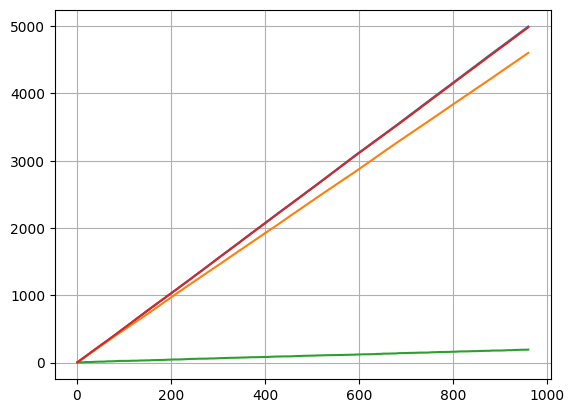

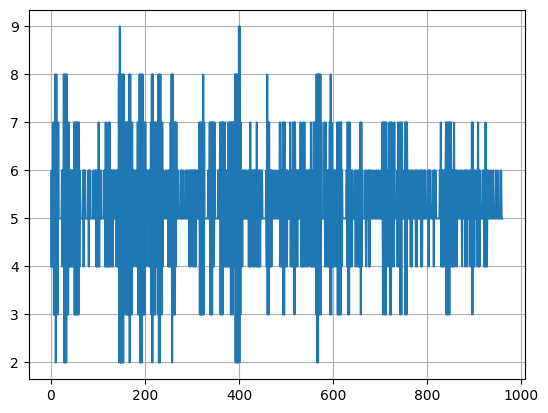

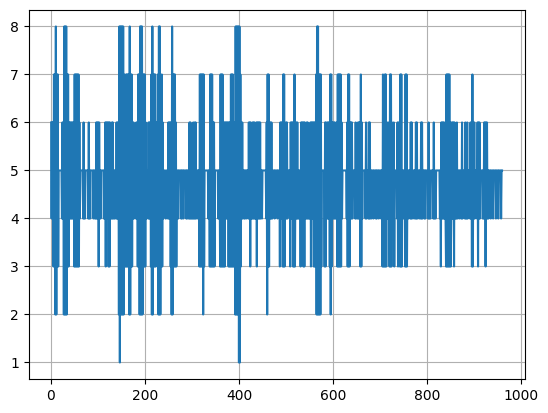

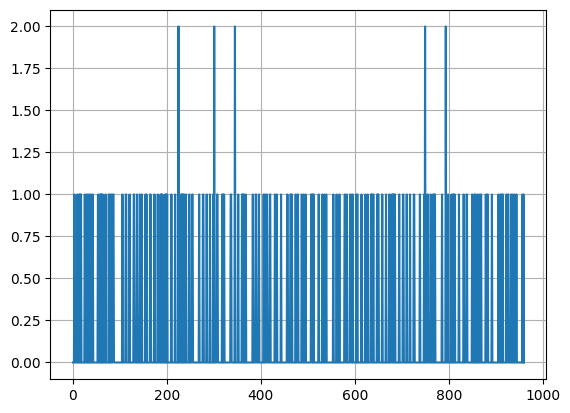

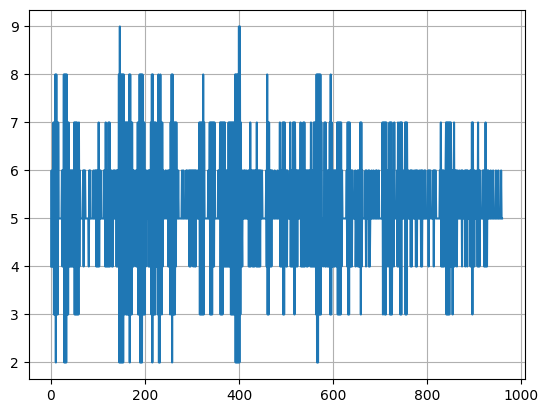

In [218]:
y = inspected_array
print(len(y[:,0]))
import matplotlib.pyplot as plt
n = [x for x in range(1,961)]

plt.figure(1)
plt.plot(n, y[0:960])
plt.grid('visible=on')

diffy = np.diff(y[:,0])
plt.figure(2)
plt.plot(n[0:959], diffy[0:959])
plt.grid('visible=on')

diffy = np.diff(y[:,1])
plt.figure(3)
plt.plot(n[0:959], diffy[0:959])
plt.grid('visible=on')

diffy = np.diff(y[:,2])
plt.figure(4)
plt.plot(n[0:959], diffy[0:959])
plt.grid('visible=on')

diffy = np.diff(y[:,3])
plt.figure(5)
plt.plot(n[0:959], diffy[0:959])
plt.grid('visible=on')


polyorder = 1
p = np.zeros((num_monkeys,polyorder+1))
for m in range(num_monkeys):
    p[m,:] = np.polyfit(n[200:960], y[200:960,m], polyorder)
    yfit = np.polyval(p[m,:],3000)
    print(f'p = {p[m,:]}, yfit = {yfit}')


